<div>
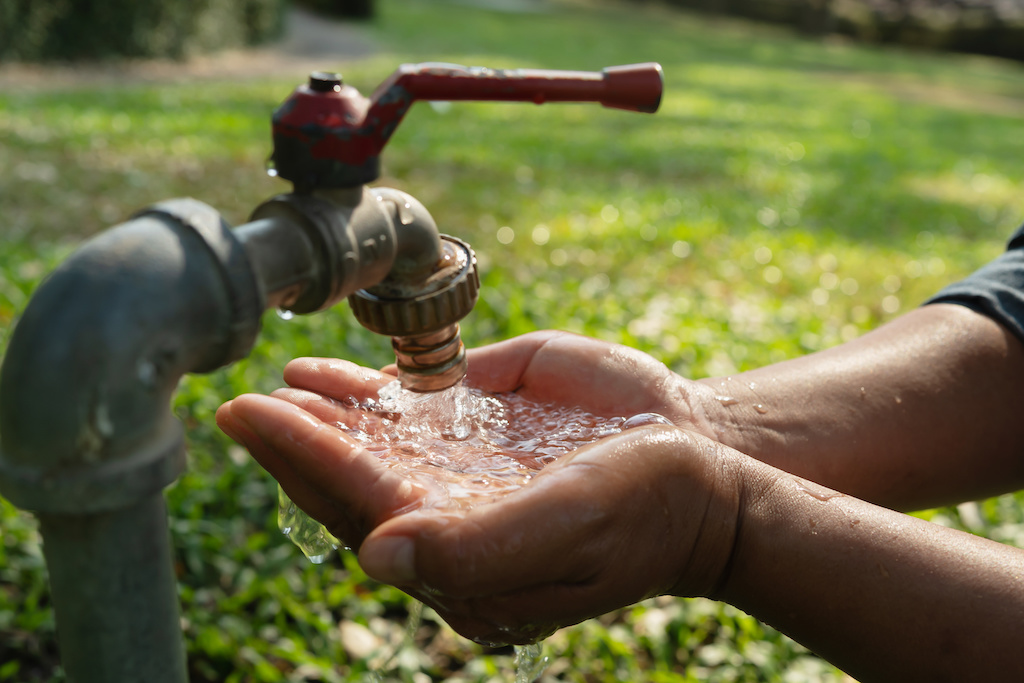
</div>
Photo by <a href="https://stock.adobe.com/contributor/203603884/lovelyday12?load_type=author&prev_url=detail" >lovelyday12</a> on Adobe Stock

# Phase 3 Project: *Tanzanian Water Pump Conditions Classification Model*

### By Ryan Posternak

Flatiron School, Full-time Live NYC<br>
Project Presentation Date: July 15th, 2022<br>
Instructor: Joseph Mata

## Goal: Identify which water pumps in Tanzania are functional or in need of repair based on a variety of conditions and information on the pump

This is an asssignment for learning purposes. The Tanzanian Ministry of Water is not involved with this assignment in any way.

# Overview and Business Understanding

In the United States, most of us take for granted that we always have access to clean and safe drinking water. But for hundreds of millions of people across the world, they don't have this luxury. One such nation that is struggling with water insecurity is Tanzania, where as much as half the country–over 20 million people–<a href="https://lifewater.org/blog/tanzania-water-crisis-facts/" >do not have access to safe drinking water.</a><br>
<br>
In order to combat this crisis, <a href="http://taarifa.org/" >Taarifa</a> and the <a href="http://maji.go.tz/" >Tanzanian Ministry of Water </a> have teamed up to gather data on the nations many water pumps - the primary source of safe drinking water for most Tanzanians. Using this data, I build a classification model that predicts whether a water pump is functional or needs attention (either non-functional or in need of repair).<br>
<br>
Using this model, the Tanzanian Ministry of Water will be able to improve their efficiency in repairing dysfunctional water pumps, and improve access to clean drinking water for millions of people.<br>
<br>

<br>

# Data Understanding

This dataset was provided by Taarifa and the Tanzanian Ministry of Water, and was obtained from <a href="https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/"> drivendata.org </a>as part of their competition entitled "Pump it Up: Data Mining the Water Table". The provided data was pre-split into training and testing data. As this dataset is part of a competition, labels were provided for the training data only. The training dataset contains 59,400 rows and 40 columns, while the testing dataset contains 14,850 rows.

<br>

# Initial EDA

### Description of columns

**amount_tsh** - Total static head (amount water available to waterpoint)<br>
**date_recorded** - The date the row was entered<br>
**funder** - Who funded the well<br>
**gps_height** - Altitude of the well<br>
**installer** - Organization that installed the well<br>
**longitude** - GPS coordinate<br>
**latitude** - GPS coordinate<br>
**wpt_name** - Name of the waterpoint if there is one<br>
**basin** - Geographic water basin<br>
**subvillage** - Geographic location<br>
**region** - Geographic location<br>
**region_code** - Geographic location (coded)<br>
**district_code** - Geographic location (coded)<br>
**lga** - Geographic location<br>
**ward** - Geographic location<br>
**population** - Population around the well<br>
**public_meeting** - True/False<br>
**recorded_by** - Group entering this row of data<br>
**scheme_management** - Who operates the waterpoint<br>
**scheme_name** - Who operates the waterpoint<br>
**permit** - If the waterpoint is permitted<br>
**construction_year** - Year the waterpoint was constructed<br>
**extraction_type** - The kind of extraction the waterpoint uses<br>
**extraction_type_group** - The kind of extraction the waterpoint uses<br>
**extraction_type_class** - The kind of extraction the waterpoint uses<br>
**management** - How the waterpoint is managed<br>
**management_group** - How the waterpoint is managed<br>
**payment** - What the water costs<br>
**payment_type** - What the water costs<br>
**water_quality** - The quality of the water<br>
**quality_group** - The quality of the water<br>
**quantity** - The quantity of water<br>
**quantity_group** - The quantity of water<br>
**source** - The source of the water<br>
**source_type** - The source of the water<br>
**source_class** - The source of the water<br>
**waterpoint_type** - The kind of waterpoint<br>
**waterpoint_type_group** - The kind of waterpoint<br>
<br>

### Description of labels

**functional** - the waterpoint is operational and there are no repairs needed<br>
**functional needs repair** - the waterpoint is operational, but needs repairs<br>
**non functional** - the waterpoint is not operational

In [1]:
import numpy as np
import pandas as pd

import folium

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold, KFold
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve, log_loss

from sklearn import set_config
set_config(display='diagram')

import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load up the data

# Submission format example for competition
submission_format_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')

# Load in X_train dataframe
X_train_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

# Load in y_train dataframe
y_train_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

# Load in X_test dataframe (for competition purposes only - will not be used as X_test dataframe for 
# train/test split purposes as labels were not included)
X_test_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')

In [3]:
# Preview features dataframe

print(X_train_df.shape)
X_train_df.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Preview target variables dataframe

y_train_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# Preview distribution of target variables

print(y_train_df['status_group'].value_counts(), '\n')
print(y_train_df['status_group'].value_counts(normalize=True))

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64 

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


> **Remarks:**
> - The dataset is somewhat imbalanced, with 54% in the 'functional' group, 38% in the 'non functional' group, and the remaining 7% in the 'functional needs repair' group

In [6]:
# Preview features dataframe info

X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

> **Remarks:**
> - 7 int features, 3 float features, 30 object features
> - Most features are nominal categorical descriptors, with many of the numerical descriptors actually being location identification variables
> - Some features with a lot of missing values: scheme_name, funder, installer, scheme_management


In [7]:
columns_isna = [column for column in X_train_df.columns if X_train_df[column].isna().sum() > 0]
    
print('Features with missing values:')
X_train_df[columns_isna].isna().sum()

Features with missing values:


funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

In [8]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


> **Remarks:**
> - No missing `status_group` labels

In [9]:
X_train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Visualization of Water Pumps

To get an idea of the distribution of the different water pumps and their respective conditions, we'll build a folium map with each marker color-coded with the pump's condition. This may also give us some insight into any geographic trends that may be influencing the condition of the pumps.

In [10]:
# Coordinates of Dodoma - capital of Tanzania
dodoma_lat = -6.1630
dodoma_long = 35.7516

# Create a map of the area
base_map = folium.Map([dodoma_lat, dodoma_long], zoom_start=5.5)

# Add random sample of 300 water pumps to map, colored by water pump condition
for index, pump in X_train_df.sample(n=300).iterrows():
    lat = pump.latitude
    long = pump.longitude
    if y_train_df.iloc[index].status_group == 'functional':
        color = 'green'
    elif y_train_df.iloc[index].status_group == 'functional needs repair':
        color = 'orange'
    elif y_train_df.iloc[index].status_group == 'non functional':
        color = 'red'
    marker = folium.Marker(location=[lat, long])
    marker.add_to(base_map)
    popup_text = f"Condition: {y_train_df.iloc[index].status_group.capitalize()}"
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup, icon=folium.Icon(color))
    marker.add_to(base_map)
base_map

> **Remarks:**
> - There doesn't appear to be any obvious geographic trends affecting pump condition in the distribution of pumps across Tanzania

<br>

# Preprocessing

### Drop `id` column of X_train and y_train

ID numbers are not necessary for modeling purposes (I am assuming they carry no predictive value)

In [11]:
X_train_df.drop(columns='id', inplace=True)

y_train_df.drop(columns='id', inplace=True)

### Convert `status_group` column of y_train from ternary object to binary int: 0 if 'functional', 1 if 'functional needs repair' or 'non functional'

To simplify the modeling process, we'll convert this from a multi-class classification problem to a binary classification: 0 if the pump is functional and 1 if the pump needs attention

In [12]:
y_train_df.replace({'functional': 0, 'functional needs repair': 1, 'non functional': 1}, inplace=True)

# Sanity check
y_train_df.value_counts()

status_group
0               32259
1               27141
dtype: int64

### Drop additional valueless variables:

1. **`funder` and `installer`** - Who funded the well<br>
While some value may be lost by dropping these features, they would be cumbersome to work with as they contain thousands of unique values, and many of the values have only one corresponding row<br>
<br>
2. **`date_recorded`** - The date the row was entered<br>
Unlikely to carry any predictive value - date of construction is already captured in `construction_year`<br>
<br>
3. **`longitude`** and **`latitude`** - GPS coordinates<br>
Such specific location information is unlikely to carry much predictive value, and substantial location information is already captured in other columns<br>
<br>
4. **`num_private`** - Undisclosed<br>
It is undisclosed what this feature means, but 58,643 of the 59,400 rows all contain '0' for this feature and many of the values of the feature have only one corresponding row, so it would be cumbersome to work with and is unlikely to carry any predictive value anyway<br>
<br>
5. **`region`** - Geographic location<br>
Essentially the same information as `region_code` column, but with what appears to be slighly less granularity. Since `region_code` contains more granularity, we'll keep that one.<br>
<br>
6. **`wpt_name`** - Name of the waterpoint if there is one<br>
Unlikely to carry much predictive value — most of the values for this feature are unique to one row or have value 'none', and substantial waterpoint information is captured in other variables<br>
<br>
7. **`subvillage`** - Geographic location<br>
May potentially carry some predictive value, however substantial location information is already contained in other columns, and numerous subvillages exist with only a single row which would be tricky to deal with while modeling. Additionally, 371 missing values exist for this column.<br>
<br>
8. **`ward`** - Geographic location<br>
Contains over 2k unique values, many with only one corresponding row, which would be cumbersome to work with. Additionally, location information is captured in other variables.<br>
<br>
9. **`recorded_by`** - Group entering this row of data<br>
All rows have same value for this feature: 'GeoData Consultants Ltd'<br>
<br>
10. **`scheme_management`** and **`management_group`**- Who operates the waterpoint / How the waterpoint is managed<br>
`management`, `management_group`, and `scheme_management`, all contain largely the same information, with variations on the level of granularity. Since `management` contains more granular information than `management_group` and is missing fewer values than `scheme_management`, we'll keep that one.<br>
<br>
11. **`scheme_name`** - Who operates the waterpoint<br>
Feature contains 28,166 missing values, plus 664 where the value is equal to 'None'. Additionally, many of the values for this feature have only one corresponding row, and information on the operator is also captured in the `management` feature which has no missing values. As such, we'll drop this feature, though there may be a small amount of predictive value in it.<br>
<br>
12. **`extraction_type_group`** and **`extraction_type_class`** - The kind of extraction the waterpoint uses<br>
`extraction_type`, `extraction_type_group`, and `extraction_type_class` all contain largely the same information, with variations on the level of granularity. Since `extraction_type` contains the most granular information, we'll keep that one.<br>
<br>
13. **`payment`** - What the water costs<br>
Exact duplicate of information in column `payment_type`<br>
<br>
14. **`quality_group`** - The quality of the water<br>
Essentially the same information as `water_quality` column, with less granularity. Since `water_quality` contains more granularity, we'll keep that one.<br>
<br>
15. **`quantity_group`** - The quantity of water<br>
Exact duplicate of information in column `quantity`<br>
<br>
16. **`source_type`** and **`source_class`** - The source of the water<br>
`source`, `source_type`, and `source_class` all contain largely the same information, with variations on the level of granularity. Since `source` contains the most granular information, we'll keep that one.<br>
<br>
17. **`waterpoint_type_group`** - The kind of waterpoint<br>
Essentially the same information as `waterpoint_type` column, with less granularity. Since `waterpoint_type` contains more granularity, we'll keep that one.

In [13]:
columns_to_drop = ['funder', 'installer', 'date_recorded', 'longitude', 'latitude', 'num_private', 'region', 
                   'wpt_name', 'subvillage', 'ward', 'recorded_by', 'scheme_management', 'scheme_name', 
                   'extraction_type_group', 'extraction_type_class', 'management_group', 'payment', 
                   'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']

X_train_df.drop(columns=columns_to_drop, inplace=True)

# Preview new dataframe
X_train_df.head()

,amount_tsh,gps_height,basin,region_code,district_code,lga,population,public_meeting,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type
0,6000.0,1390,Lake Nyasa,11,5,Ludewa,109,True,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe
1,0.0,1399,Lake Victoria,20,2,Serengeti,280,NaN,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,686,Pangani,21,4,Simanjiro,250,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,263,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple
4,0.0,0,Lake Victoria,18,1,Karagwe,0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe


### Convert `region_code` and `district_code` to datatype 'object'

These features are actually nominal categorical features describing location, despite being in integer form. Converting them to datatype 'object' will make them easier to work with when it comes time to build pipelines.

In [14]:
X_train_df['region_code'] = X_train_df['region_code'].astype('object')

X_train_df['district_code'] = X_train_df['district_code'].astype('object')

### Convert `public_meeting` and `permit` columns from object to numeric: 0 if 'False', 1 if 'True'

Converting these from boolean to int will help when one hot encoding

In [15]:
X_train_df['public_meeting'].replace({False: 0, True: 1}, inplace=True)

X_train_df['permit'].replace({False: 0, True: 1}, inplace=True)

In [16]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   gps_height         59400 non-null  int64  
 2   basin              59400 non-null  object 
 3   region_code        59400 non-null  object 
 4   district_code      59400 non-null  object 
 5   lga                59400 non-null  object 
 6   population         59400 non-null  int64  
 7   public_meeting     56066 non-null  float64
 8   permit             56344 non-null  float64
 9   construction_year  59400 non-null  int64  
 10  extraction_type    59400 non-null  object 
 11  management         59400 non-null  object 
 12  payment_type       59400 non-null  object 
 13  water_quality      59400 non-null  object 
 14  quantity           59400 non-null  object 
 15  source             59400 non-null  object 
 16  waterpoint_type    594

### Drop rows with missing values for both `public_meeting` and `permit`

These are the only columns remaining that have missing values

In [17]:
columns_isna = [column for column in X_train_df.columns if X_train_df[column].isna().sum() > 0]
    
print('Features with missing values:')
X_train_df[columns_isna].isna().sum()

Features with missing values:


public_meeting    3334
permit            3056
dtype: int64

Since there aren't that many rows that have NaN values for both `public_meeting` and `permit`, we'll drop them. For the rest, we'll impute the most common value, which is 1.0 for both, which is performed in our ColumnTransformer.

In [18]:
X_train_df[X_train_df[['public_meeting', 'permit']].isnull().all(axis=1)].head()

,amount_tsh,gps_height,basin,region_code,district_code,lga,population,public_meeting,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type
190,0.0,1660,Internal,13,2,Singida Rural,1,NaN,NaN,2010,submersible,vwc,unknown,unknown,unknown,machine dbh,communal standpipe
551,0.0,1525,Internal,13,2,Singida Rural,1,NaN,NaN,1980,other,vwc,unknown,unknown,dry,shallow well,other
615,0.0,1253,Internal,13,2,Singida Rural,1,NaN,NaN,2000,other,vwc,never pay,soft,insufficient,rainwater harvesting,communal standpipe
728,0.0,1475,Lake Victoria,20,2,Serengeti,300,NaN,NaN,2009,submersible,private operator,other,salty,enough,machine dbh,other
786,0.0,1414,Lake Victoria,20,2,Serengeti,393,NaN,NaN,2009,gravity,other,unknown,soft,seasonal,rainwater harvesting,communal standpipe


In [19]:
len_rows_nan_both = X_train_df[X_train_df[['public_meeting', 'permit']].isnull().all(axis=1)].shape[0]

print(f'Number of rows with missing values for both public_meeting and permit:  {len_rows_nan_both}')
print(f'Percent of rows with missing values for both public_meeting and permit:  \
{round((len_rows_nan_both / X_train_df.shape[0] * 100), 3)}%')

Number of rows with missing values for both public_meeting and permit:  271
Percent of rows with missing values for both public_meeting and permit:  0.456%


In [20]:
print(X_train_df['public_meeting'].value_counts())
print()
print(X_train_df['permit'].value_counts())

1.0    51011
0.0     5055
Name: public_meeting, dtype: int64

1.0    38852
0.0    17492
Name: permit, dtype: int64


In [21]:
indexes_to_drop = X_train_df[X_train_df[['public_meeting', 'permit']].isnull().all(axis=1)].index

X_train_df.drop(index=indexes_to_drop, inplace=True)
y_train_df.drop(index=indexes_to_drop, inplace=True)

X_train_df.shape

(59129, 17)

### Examine `construction_year` column

A value of '0' seems to be a placeholder for "Unknown" for this column. We'll impute the median here, which is performed in our ColumnTransformer.

In [22]:
X_train_df.construction_year.value_counts()[:5]

0       20681
2010     2609
2008     2607
2009     2514
2000     2047
Name: construction_year, dtype: int64

<br>

# Train/Test Split

As we saw above, this is an unbalanced dataset, so we'll set stratify=y to ensure an even balance of labels between train and test sets. We'll keep that default test size of 0.25.

In [23]:
X = X_train_df.copy()
y = y_train_df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [24]:
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')
print()

# Check that target variables are evenly distributed between y_train and y_test
print(f'Training set: {y_train.value_counts(normalize=True)}')
print(f'Testing set: {y_test.value_counts(normalize=True)}')

Training set: (44346, 17), (44346, 1)
Testing set: (14783, 17), (14783, 1)

Training set: status_group
0               0.542913
1               0.457087
dtype: float64
Testing set: status_group
0               0.542921
1               0.457079
dtype: float64


<br>

# Create ColumnTransformer to Preprocess Data

**Rundown:**
- Impute NaN values in `public_meeting` and `permit` columns with value of 1.0<br>
<br>
- Impute '0' values in `construction_year` with the median value, then standard scale<br>
<br>
- Standard scale the remaining numeric columns (`amount_tsh`, `gps_height`, and `population`)<br>
<br>
- One hot encode categorical columns

In [25]:
con_year_pipeline = Pipeline([
    ('con_year_imputer', SimpleImputer(missing_values=0, strategy='median')), 
    ('standard_scale', StandardScaler())
    ])

numeric_pipeline = Pipeline([ 
    ('standard_scale', StandardScaler())
    ])

categorical_pipeline = Pipeline([
    ('one_hot_encode', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
     ])

# Numerical columns, not including construction_year or the two boolean columns
ss_cols = ['amount_tsh', 'gps_height', 'population']
# Categorical columns
ohe_cols = list(X_train.select_dtypes('object').columns)

ct = ColumnTransformer([
    ('ss_pipe', numeric_pipeline, ss_cols), 
    ('bool_imputer', SimpleImputer(strategy='constant', fill_value=1.0), ['public_meeting', 'permit']), 
    ('con_year_pipe', con_year_pipeline, ['construction_year']), 
    ('ohe_pipe', categorical_pipeline, ohe_cols)
    ], 
    remainder='passthrough')

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ss_pipe',
                                 Pipeline(steps=[('standard_scale',
                                                  StandardScaler())]),
                                 ['amount_tsh', 'gps_height', 'population']),
                                ('bool_imputer',
                                 SimpleImputer(fill_value=1.0,
                                               strategy='constant'),
                                 ['public_meeting', 'permit']),
                                ('con_year_pipe',
                                 Pipeline(steps=[('con_year_imputer',
                                                  SimpleImputer(missing_values=0,
                                                                strategy='median')),
                                                 ('standard_scale',
                                                  StandardScaler())]),
                                 ['construction_year']),
                                ('ohe_pipe',
                                 Pipeline(steps=[('one_hot_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['basin', 'region_code', 'district_code',
                                  'lga', 'extraction_type', 'management',
                                  'payment_type', 'water_quality', 'quantity',
                                  'source', 'waterpoint_type'])])

In [26]:
pd.DataFrame(ct.fit_transform(X_train), columns=ct.get_feature_names_out())

,ss_pipe__amount_tsh,ss_pipe__gps_height,ss_pipe__population,bool_imputer__public_meeting,bool_imputer__permit,con_year_pipe__construction_year,ohe_pipe__basin_Lake Nyasa,ohe_pipe__basin_Lake Rukwa,ohe_pipe__basin_Lake Tanganyika,ohe_pipe__basin_Lake Victoria,...,ohe_pipe__source_river,ohe_pipe__source_shallow well,ohe_pipe__source_spring,ohe_pipe__source_unknown,ohe_pipe__waterpoint_type_communal standpipe,ohe_pipe__waterpoint_type_communal standpipe multiple,ohe_pipe__waterpoint_type_dam,ohe_pipe__waterpoint_type_hand pump,ohe_pipe__waterpoint_type_improved spring,ohe_pipe__waterpoint_type_other
0,-0.113808,0.927836,-0.106122,1.0,1.0,1.187473,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.113808,1.446183,0.040178,1.0,1.0,-0.781481,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.113808,-1.001165,0.667178,1.0,1.0,0.202996,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.113808,0.021090,0.458178,1.0,1.0,1.089026,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.113808,-0.988170,-0.120752,1.0,1.0,0.596787,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44341,-0.113808,1.106875,-0.168822,1.0,0.0,-2.356645,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44342,-0.113808,-0.529022,-0.168822,1.0,1.0,-2.061302,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44343,-0.113808,-0.962181,-0.377823,1.0,1.0,0.202996,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44344,-0.113808,-0.962181,-0.377823,1.0,1.0,0.202996,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<br>

# Create Function to Cross Validate and Print Model Scores

In [27]:
def cross_validate_and_score(X_train, y_train, estimator):
    
    accuracy_score_train_list = []
    accuracy_score_val_list = []
    
    precision_score_train_list = []
    precision_score_val_list = []
    
    recall_score_train_list = []
    recall_score_val_list = []
    
    f1_score_train_list = []
    f1_score_val_list = []

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold()
    for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t, y_t.values.ravel())
        
        # Accuracy score results
        accuracy_train = accuracy_score(y_t, estimator.predict(X_t))
        accuracy_val = accuracy_score(y_val, estimator.predict(X_val))
        accuracy_score_train_list.append(accuracy_train)
        accuracy_score_val_list.append(accuracy_val)
        
        # Precision score results
        precision_train = precision_score(y_t, estimator.predict(X_t))
        precision_val = precision_score(y_val, estimator.predict(X_val))
        precision_score_train_list.append(precision_train)
        precision_score_val_list.append(precision_val)
        
        # Recall score results
        recall_train = recall_score(y_t, estimator.predict(X_t))
        recall_val = recall_score(y_val, estimator.predict(X_val))
        recall_score_train_list.append(recall_train)
        recall_score_val_list.append(recall_val)
        
        # F1 score results
        f1_train = f1_score(y_t, estimator.predict(X_t))
        f1_val = f1_score(y_val, estimator.predict(X_val))
        f1_score_train_list.append(f1_train)
        f1_score_val_list.append(f1_val)
        
    print(f"Training Accuracy: {round(np.mean(accuracy_score_train_list), 6)}, Validation Accuracy: {round(np.mean(accuracy_score_val_list), 6)}")
    print('-'*60)
    print(f"Training Precision: {round(np.mean(precision_score_train_list), 6)}, Validation Precision: {round(np.mean(precision_score_val_list), 6)}")
    print('-'*60)
    print(f"Training Recall: {round(np.mean(recall_score_train_list), 6)}, Validation Recall: {round(np.mean(recall_score_val_list), 6)}")
    print('-'*60)
    print(f"Training F1 Score: {round(np.mean(f1_score_train_list), 6)}, Validation F1 Score: {round(np.mean(f1_score_val_list), 6)}")

<br>

# Baseline: Dummy Classifier

In [28]:
steps=[('preprocessing', ct), 
       ('dc', DummyClassifier(strategy='most_frequent'))]

dummy_pipe = Pipeline(steps)

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                                   StandardScaler())]),
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('dc', DummyClassifier(strategy='most_frequent'))])

In [29]:
# Ignore UndefinedMetricWarnings being thrown due to the model being a dummy classifier
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

cross_validate_and_score(X_train, y_train, dummy_pipe)
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore', UndefinedMetricWarning)
#     cross_validate_and_score(X_train, y_train, dummy_pipe)

Training Accuracy: 0.542913, Validation Accuracy: 0.542913
------------------------------------------------------------
Training Precision: 0.0, Validation Precision: 0.0
------------------------------------------------------------
Training Recall: 0.0, Validation Recall: 0.0
------------------------------------------------------------
Training F1 Score: 0.0, Validation F1 Score: 0.0


> **Remarks:**
> - Since this is a dummy classifier that classifies everything as the most frequent label in the dataset, we get an accuracy score equivalent to the proportion of the most frequent label in the dataset. Since this label is '0' in this dataset, we have only true positives and no true negatives, so the other three scores are zero.

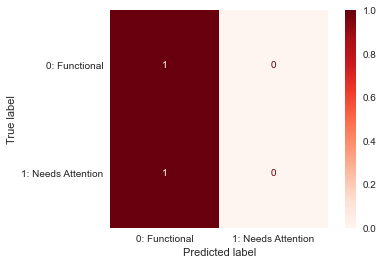

In [30]:
# Define confusion matrix label names
class_names = ['0: Functional', '1: Needs Attention']

# Plot confusion matrix
plot_confusion_matrix(dummy_pipe, X_train, y_train, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

<br>

# Model 1.1: Logistic Regression, Iteration 1

In [31]:
# Take all the default argument for LogisticRegression model
steps=[('preprocessing', ct), 
       ('logreg', LogisticRegression(random_state=42))]

lr_1_pipe = Pipeline(steps)

lr_1_pipe.fit(X_train, y_train.values.ravel())

/Users/ryanposternak/opt/anaconda3/envs/new-learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                                   StandardScaler())]),
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('logreg', LogisticRegression(random_state=42))])

In [32]:
# Ignore ConvergenceWarnings being thrown due to lack of convergence in gradient descent
warnings.filterwarnings('ignore', category=ConvergenceWarning)

cross_validate_and_score(X_train, y_train, lr_1_pipe)

Training Accuracy: 0.772629, Validation Accuracy: 0.772629
------------------------------------------------------------
Training Precision: 0.796019, Validation Precision: 0.796102
------------------------------------------------------------
Training Recall: 0.675728, Validation Recall: 0.675728
------------------------------------------------------------
Training F1 Score: 0.730956, Validation F1 Score: 0.730972


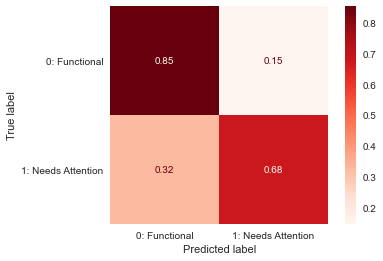

In [33]:
# Plot confusion matrix
class_names = ['0: Functional', '1: Needs Attention']
plot_confusion_matrix(lr_1_pipe, X_train, y_train, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.46529
AUC score: 0.85175


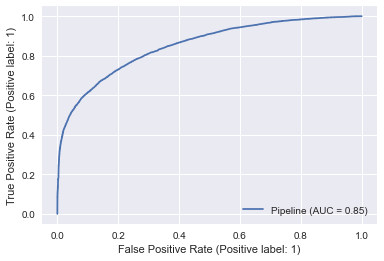

In [34]:
probas = lr_1_pipe.predict_proba(X_train)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_train, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_train, probas), 5)}")

# Plot roc_curve
plot_roc_curve(lr_1_pipe, X_train, y_train);

> **Remarks:**
> - We're not doing too bad with a simple LogisticRegression model. Nearly 77% accuracy and 73% F1 score. We seem to be doing better classifying positives than negatives so far.

<br>

# Model 1.2: Logistic Regression, Iteration 2

Let's run the same LR model as before, but with balanced class weights

In [35]:
steps=[('preprocessing', ct), 
       ('logreg', LogisticRegression(class_weight='balanced', random_state=42))]

lr_2_pipe = Pipeline(steps)

lr_2_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('logreg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [36]:
cross_validate_and_score(X_train, y_train, lr_2_pipe)

Training Accuracy: 0.769923, Validation Accuracy: 0.769923
------------------------------------------------------------
Training Precision: 0.764379, Validation Precision: 0.764382
------------------------------------------------------------
Training Recall: 0.717958, Validation Recall: 0.717958
------------------------------------------------------------
Training F1 Score: 0.740441, Validation F1 Score: 0.740437


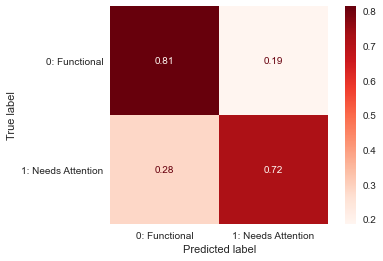

In [37]:
# Plot confusion matrix
plot_confusion_matrix(lr_2_pipe, X_train, y_train, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.46764
AUC score: 0.85185


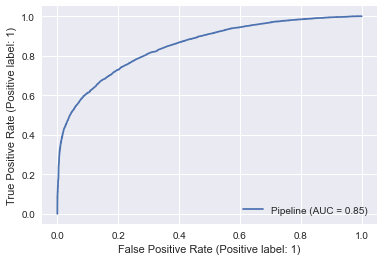

In [38]:
probas = lr_2_pipe.predict_proba(X_train)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_train, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_train, probas), 5)}")

# Plot roc_curve
plot_roc_curve(lr_2_pipe, X_train, y_train);

> **Remarks:**
> - After setting balanced class weights, our precision score decreased by about 0.04, while recall increased by about the same. There was a very slight drop in accuracy, about 0.001, but a 0.009 increase in F1 score. Log-loss also increased by about 0.0015. Overall, not much change, but since the log-loss score and accuracy scores increased, we won't keep this change going forward.

<br>

# Model 1.3: Logistic Regression, Iteration 3

In [39]:
# Ignore UserWarnings being thrown
warnings.filterwarnings('ignore', category=UserWarning)

steps=[('preprocessing', ct), 
       ('logreg', LogisticRegression(random_state=42))]

lr_3_pipe = Pipeline(steps)

pipe_grid = {'logreg__C': list(range(8, 16))}

lr_3_gs_pipe = GridSearchCV(estimator=lr_3_pipe, 
                            param_grid=pipe_grid, 
                            cv=4)

lr_3_gs_pipe.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ss_pipe',
                                                                         Pipeline(steps=[('standard_scale',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population']),
                                                                        ('bool_imputer',
                                                                         SimpleImputer(fill_value=1.0,
                                                                                       strategy='constant'),
                                                                         ['public_meeting',
                                                                          'permit']),
                                                                        ('con_year_pipe',
                                                                         Pipeline(steps...
                                                                         Pipeline(steps=[('one_hot_encode',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['basin',
                                                                          'region_code',
                                                                          'district_code',
                                                                          'lga',
                                                                          'extraction_type',
                                                                          'management',
                                                                          'payment_type',
                                                                          'water_quality',
                                                                          'quantity',
                                                                          'source',
                                                                          'waterpoint_type'])])),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [8, 9, 10, 11, 12, 13, 14, 15]})

In [40]:
lr_3_gs_pipe.best_params_

{'logreg__C': 15}

In [45]:
steps=[('preprocessing', ct), 
       ('logreg', LogisticRegression(C=15, random_state=42))]

lr_3_pipe = Pipeline(steps)

lr_3_pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss_pipe',
                                                  Pipeline(steps=[('standard_scale',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('bool_imputer',
                                                  SimpleImputer(fill_value=1.0,
                                                                strategy='constant'),
                                                  ['public_meeting', 'permit']),
                                                 ('con_year_pipe',
                                                  Pipeline(steps=[('con_year_imputer',
                                                                   Simple...
                                                                   StandardScaler())]),
                                                  ['construction_year']),
                                                 ('ohe_pipe',
                                                  Pipeline(steps=[('one_hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region_code',
                                                   'district_code', 'lga',
                                                   'extraction_type',
                                                   'management', 'payment_type',
                                                   'water_quality', 'quantity',
                                                   'source',
                                                   'waterpoint_type'])])),
                ('logreg', LogisticRegression(C=15, random_state=42))])

In [46]:
cross_validate_and_score(X_train, y_train, lr_3_pipe)

Training Accuracy: 0.772223, Validation Accuracy: 0.772223
------------------------------------------------------------
Training Precision: 0.793584, Validation Precision: 0.793659
------------------------------------------------------------
Training Recall: 0.678046, Validation Recall: 0.678046
------------------------------------------------------------
Training F1 Score: 0.731279, Validation F1 Score: 0.731291


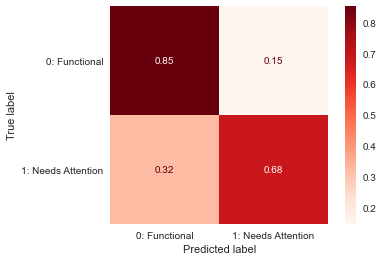

In [47]:
# Plot confusion matrix
plot_confusion_matrix(lr_3_pipe, X_train, y_train, normalize='true', display_labels=class_names, cmap='Reds')
plt.grid(False);

Log-loss: 0.46512
AUC score: 0.85192


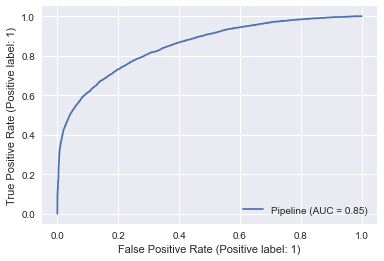

In [48]:
probas = lr_3_pipe.predict_proba(X_train)[:, 1]

# Print log-loss
print(f"Log-loss: {round(log_loss(y_train, probas), 5)}")

# Print AUC score
print(f"AUC score: {round(roc_auc_score(y_train, probas), 5)}")

# Plot roc_curve
plot_roc_curve(lr_3_pipe, X_train, y_train);